#### how I will tackle this problem ?                 
step by step procedure                                                          
1.import data from multiple files combine into one                    
2.store this data into single csv                  
3.load new csv , use only required columns                
4.cleaning the csv                              
    1.import new csv that has card info with their cost only two columns                   
    2.map with the main csv                       
    3.i have one column that has cost of cards                  
    4.replace this column with every column in set                    
4.2 create a outcome column for target i.e dependent and independent features                     
    for dependent feature subtract crown of player 1 from player 2 wich will give values ranging from -3 to +3                   
    all the positive values means player 1 won so replace values with 0 and 1 ...0 being loss and 1 being win (obivious )                          
     
5.drop the original columns and keep mapped columns having card costs                   
6.handle missing values - replace missing values by 2-5 because max elixer cost of cards is 9 and min is 1                                   
and our missing data is most likely to be in range of 2-5 with "most"(this might cause us accuracy issue) cards being cycle cards                
7.test train split - we will be using this whole dataset to train and we will get new dataset for testing                                               
8.applying algorithm - we will treat this as classification problem so we will go with logistic first            
    depending on the accuracy we might use ensemble techniques                               
9.accuracy check - cv score or confusion matrix will the job but if not we might need to consider own evaluation technique                             
10.model deployement - flask app/heroku                     





####  importing required libs

In [1]:
import pandas as pd
import os
import glob


path = "A:\machine learning\project\project_cr\datasets"
all_files = glob.glob(path +"/*.csv")
li = []
for i in all_files:
    data = pd.read_csv(i,index_col=None,header=0)
    li.append(data)

    
df = pd.concat(li,axis= 0 , ignore_index= True)

### dumping the file in new single csv

In [2]:
df.to_csv("battle_info.csv")
# print(df.head())




df = pd.read_csv("battle_info.csv",usecols=["type","team_0_crowns","team_0_cards_0_name","team_0_cards_1_name","team_0_cards_2_name","team_0_cards_3_name","team_0_cards_4_name","team_0_cards_5_name","team_0_cards_6_name","team_0_cards_7_name","opponent_0_cards_0_name","opponent_0_cards_1_name","opponent_0_cards_2_name","opponent_0_cards_3_name","opponent_0_cards_4_name","opponent_0_cards_5_name","opponent_0_cards_6_name","opponent_0_cards_7_name","opponent_0_crowns"])
df.head()

,type,team_0_crowns,team_0_cards_0_name,team_0_cards_1_name,team_0_cards_2_name,team_0_cards_3_name,team_0_cards_4_name,team_0_cards_5_name,team_0_cards_6_name,team_0_cards_7_name,opponent_0_crowns,opponent_0_cards_0_name,opponent_0_cards_1_name,opponent_0_cards_2_name,opponent_0_cards_3_name,opponent_0_cards_4_name,opponent_0_cards_5_name,opponent_0_cards_6_name,opponent_0_cards_7_name
0,casual2v2,1,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,0,P.E.K.K.A,Miner,Musketeer,Fireball,Bats,Skeleton King,Skeletons,The Log
1,friendly,1,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,0,The Log,Princess,Rocket,Goblin Barrel,Goblin Gang,Tesla,Ice Spirit,Valkyrie
2,friendly,0,Miner,The Log,Electro Spirit,Rocket,Royal Delivery,Tesla,Skeletons,Dark Prince,1,Golem,Tornado,Balloon,Skeleton Army,Rocket,Night Witch,Clone,Lumberjack
3,friendly,3,Bowler,Fireball,Goblin Barrel,The Log,Mirror,Minion Horde,Furnace,Rascals,1,Royal Ghost,Magic Archer,Bandit,Heal Spirit,Battle Ram,The Log,Elite Barbarians,Cannon Cart
4,friendly,0,Mortar,Mega Minion,Firecracker,The Log,Tornado,Skeletons,Valkyrie,Earthquake,1,Graveyard,Archers,Inferno Dragon,Arrows,Bomb Tower,Valkyrie,Poison,Cannon Cart


In [3]:
###### encoding "type" column  

In [4]:
dict = { "friendly":4,
         "PvP":4, 
        "challenge": 4,
        "clanMate":4,
        "casual2v2" :0 }
df["type"] = df["type"].map(dict)

df.head()

,type,team_0_crowns,team_0_cards_0_name,team_0_cards_1_name,team_0_cards_2_name,team_0_cards_3_name,team_0_cards_4_name,team_0_cards_5_name,team_0_cards_6_name,team_0_cards_7_name,opponent_0_crowns,opponent_0_cards_0_name,opponent_0_cards_1_name,opponent_0_cards_2_name,opponent_0_cards_3_name,opponent_0_cards_4_name,opponent_0_cards_5_name,opponent_0_cards_6_name,opponent_0_cards_7_name
0,0,1,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,0,P.E.K.K.A,Miner,Musketeer,Fireball,Bats,Skeleton King,Skeletons,The Log
1,4,1,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,0,The Log,Princess,Rocket,Goblin Barrel,Goblin Gang,Tesla,Ice Spirit,Valkyrie
2,4,0,Miner,The Log,Electro Spirit,Rocket,Royal Delivery,Tesla,Skeletons,Dark Prince,1,Golem,Tornado,Balloon,Skeleton Army,Rocket,Night Witch,Clone,Lumberjack
3,4,3,Bowler,Fireball,Goblin Barrel,The Log,Mirror,Minion Horde,Furnace,Rascals,1,Royal Ghost,Magic Archer,Bandit,Heal Spirit,Battle Ram,The Log,Elite Barbarians,Cannon Cart
4,4,0,Mortar,Mega Minion,Firecracker,The Log,Tornado,Skeletons,Valkyrie,Earthquake,1,Graveyard,Archers,Inferno Dragon,Arrows,Bomb Tower,Valkyrie,Poison,Cannon Cart


### making target variable 

In [5]:
df["outcome"] = df["team_0_crowns"]-df["opponent_0_crowns"]

In [6]:
import numpy as np
df["outcome"]=np.where(df["outcome"]<0,0,1)
df.head()

,type,team_0_crowns,team_0_cards_0_name,team_0_cards_1_name,team_0_cards_2_name,team_0_cards_3_name,team_0_cards_4_name,team_0_cards_5_name,team_0_cards_6_name,team_0_cards_7_name,opponent_0_crowns,opponent_0_cards_0_name,opponent_0_cards_1_name,opponent_0_cards_2_name,opponent_0_cards_3_name,opponent_0_cards_4_name,opponent_0_cards_5_name,opponent_0_cards_6_name,opponent_0_cards_7_name,outcome
0,0,1,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,0,P.E.K.K.A,Miner,Musketeer,Fireball,Bats,Skeleton King,Skeletons,The Log,1
1,4,1,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,0,The Log,Princess,Rocket,Goblin Barrel,Goblin Gang,Tesla,Ice Spirit,Valkyrie,1
2,4,0,Miner,The Log,Electro Spirit,Rocket,Royal Delivery,Tesla,Skeletons,Dark Prince,1,Golem,Tornado,Balloon,Skeleton Army,Rocket,Night Witch,Clone,Lumberjack,0
3,4,3,Bowler,Fireball,Goblin Barrel,The Log,Mirror,Minion Horde,Furnace,Rascals,1,Royal Ghost,Magic Archer,Bandit,Heal Spirit,Battle Ram,The Log,Elite Barbarians,Cannon Cart,1
4,4,0,Mortar,Mega Minion,Firecracker,The Log,Tornado,Skeletons,Valkyrie,Earthquake,1,Graveyard,Archers,Inferno Dragon,Arrows,Bomb Tower,Valkyrie,Poison,Cannon Cart,0


In [7]:
df.drop(["team_0_crowns","opponent_0_crowns"],inplace=True,axis=1)
df

,type,team_0_cards_0_name,team_0_cards_1_name,team_0_cards_2_name,team_0_cards_3_name,team_0_cards_4_name,team_0_cards_5_name,team_0_cards_6_name,team_0_cards_7_name,opponent_0_cards_0_name,opponent_0_cards_1_name,opponent_0_cards_2_name,opponent_0_cards_3_name,opponent_0_cards_4_name,opponent_0_cards_5_name,opponent_0_cards_6_name,opponent_0_cards_7_name,outcome
0,0,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,P.E.K.K.A,Miner,Musketeer,Fireball,Bats,Skeleton King,Skeletons,The Log,1
1,4,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,The Log,Princess,Rocket,Goblin Barrel,Goblin Gang,Tesla,Ice Spirit,Valkyrie,1
2,4,Miner,The Log,Electro Spirit,Rocket,Royal Delivery,Tesla,Skeletons,Dark Prince,Golem,Tornado,Balloon,Skeleton Army,Rocket,Night Witch,Clone,Lumberjack,0
3,4,Bowler,Fireball,Goblin Barrel,The Log,Mirror,Minion Horde,Furnace,Rascals,Royal Ghost,Magic Archer,Bandit,Heal Spirit,Battle Ram,The Log,Elite Barbarians,Cannon Cart,1
4,4,Mortar,Mega Minion,Firecracker,The Log,Tornado,Skeletons,Valkyrie,Earthquake,Graveyard,Archers,Inferno Dragon,Arrows,Bomb Tower,Valkyrie,Poison,Cannon Cart,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,4,Tesla,Skeletons,Royal Delivery,Knight,Earthquake,The Log,Hog Rider,Archer Queen,Mortar,Minion Horde,Skeleton King,Skeleton Army,Cannon Cart,Miner,Arrows,Dart Goblin,0
121,4,Tesla,Skeletons,Royal Delivery,Knight,Earthquake,The Log,Hog Rider,Archer Queen,Ice Golem,Hog Rider,Cannon,Fireball,Ice Spirit,Musketeer,Skeletons,The Log,1
122,4,Tesla,Skeletons,Royal Delivery,Knight,Earthquake,The Log,Hog Rider,Archer Queen,Hog Rider,Archer Queen,Fire Spirit,Skeletons,Cannon,The Log,Royal Delivery,Earthquake,1
123,4,Tesla,Skeletons,Royal Delivery,Knight,Earthquake,The Log,Hog Rider,Archer Queen,Giant,Balloon,Witch,Skeleton Army,Valkyrie,Minion Horde,Arrows,Rage,0


### separating the dependent and independent features


In [8]:
X = df.drop(["outcome"],axis = 1)
y = df["outcome"].copy()
X.reset_index(drop=True)
X

,type,team_0_cards_0_name,team_0_cards_1_name,team_0_cards_2_name,team_0_cards_3_name,team_0_cards_4_name,team_0_cards_5_name,team_0_cards_6_name,team_0_cards_7_name,opponent_0_cards_0_name,opponent_0_cards_1_name,opponent_0_cards_2_name,opponent_0_cards_3_name,opponent_0_cards_4_name,opponent_0_cards_5_name,opponent_0_cards_6_name,opponent_0_cards_7_name
0,0,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,P.E.K.K.A,Miner,Musketeer,Fireball,Bats,Skeleton King,Skeletons,The Log
1,4,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,The Log,Princess,Rocket,Goblin Barrel,Goblin Gang,Tesla,Ice Spirit,Valkyrie
2,4,Miner,The Log,Electro Spirit,Rocket,Royal Delivery,Tesla,Skeletons,Dark Prince,Golem,Tornado,Balloon,Skeleton Army,Rocket,Night Witch,Clone,Lumberjack
3,4,Bowler,Fireball,Goblin Barrel,The Log,Mirror,Minion Horde,Furnace,Rascals,Royal Ghost,Magic Archer,Bandit,Heal Spirit,Battle Ram,The Log,Elite Barbarians,Cannon Cart
4,4,Mortar,Mega Minion,Firecracker,The Log,Tornado,Skeletons,Valkyrie,Earthquake,Graveyard,Archers,Inferno Dragon,Arrows,Bomb Tower,Valkyrie,Poison,Cannon Cart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,4,Tesla,Skeletons,Royal Delivery,Knight,Earthquake,The Log,Hog Rider,Archer Queen,Mortar,Minion Horde,Skeleton King,Skeleton Army,Cannon Cart,Miner,Arrows,Dart Goblin
121,4,Tesla,Skeletons,Royal Delivery,Knight,Earthquake,The Log,Hog Rider,Archer Queen,Ice Golem,Hog Rider,Cannon,Fireball,Ice Spirit,Musketeer,Skeletons,The Log
122,4,Tesla,Skeletons,Royal Delivery,Knight,Earthquake,The Log,Hog Rider,Archer Queen,Hog Rider,Archer Queen,Fire Spirit,Skeletons,Cannon,The Log,Royal Delivery,Earthquake
123,4,Tesla,Skeletons,Royal Delivery,Knight,Earthquake,The Log,Hog Rider,Archer Queen,Giant,Balloon,Witch,Skeleton Army,Valkyrie,Minion Horde,Arrows,Rage


In [9]:
y.columns = ["index","result"]
y.head()

0    1
1    1
2    0
3    1
4    0
Name: outcome, dtype: int32

### checking frequency of most commonly used cards 

    out of 100+ cards 40 - 60 are most commonly used by top players

In [10]:
for i in X.columns :
    print(f" total catagories in {i} are {len(X[i].unique())}")

 total catagories in type are 2
 total catagories in team_0_cards_0_name are 32
 total catagories in team_0_cards_1_name are 34
 total catagories in team_0_cards_2_name are 36
 total catagories in team_0_cards_3_name are 34
 total catagories in team_0_cards_4_name are 36
 total catagories in team_0_cards_5_name are 38
 total catagories in team_0_cards_6_name are 35
 total catagories in team_0_cards_7_name are 38
 total catagories in opponent_0_cards_0_name are 54
 total catagories in opponent_0_cards_1_name are 59
 total catagories in opponent_0_cards_2_name are 58
 total catagories in opponent_0_cards_3_name are 55
 total catagories in opponent_0_cards_4_name are 68
 total catagories in opponent_0_cards_5_name are 61
 total catagories in opponent_0_cards_6_name are 52
 total catagories in opponent_0_cards_7_name are 56


In [11]:
catagories = df["team_0_cards_0_name"].value_counts(ascending=False).head(15).index
catagories

Index(['Knight', 'Princess', 'Mega Knight', 'Tesla', 'Archer Queen',
       'Wall Breakers', 'Zappies', 'Lava Hound', 'Valkyrie', 'Miner',
       'Executioner', 'Giant Skeleton', 'Skeleton King', 'Skeletons',
       'Royal Giant'],
      dtype='object')

### new csv to merge with original for mapping 

In [12]:
card = pd.read_csv("cardsinfo.csv",usecols=["name","elixir"])

#### making a dictionary to map the names with corresponding elixir

In [13]:
cards_encoded = {"name":"elixir",'Earthquake': 86.3, 'Fireball': 87.3, 'Poison': 88.3, 'The Log': 101.96000000000001, 'Tornado': 102.96000000000001, 'Zap': 85.3, 'Giant Snowball': 68.64, 'Barbarian Barrel': 85.3, 'Arrows': 86.3, 'Royal Delivery': 86.3, 'Rocket': 89.3, 'Lightning': 89.3, 'Freeze': 87.3, 'Rage': 68.64, 'Clone': 69.64, 'Mirror': 16.66, 'Golden Knight': 87.3, 'Archer Queen': 104.96000000000001, 'Skeleton King': 104.96000000000001, 'Balloon': 71.64, 'Hog Rider': 87.3, 'Royal Giant': 89.3, 'Elixir Golem': 36.32, 'Goblin Barrel': 86.3, 'Ram Rider': 88.3, 'Sparky': 55.980000000000004, 'Magic Archer': 103.96000000000001, 'Giant': 71.64, 'Battle Ram': 70.64, 'Royal Ghost': 69.64, 'Ice Wizard': 69.64, 'Mortar': 70.64, 'Skeleton Barrel': 69.64, 'X-Bow': 72.64, 'Golem': 74.64, 'Three Musketeers': 58.980000000000004, 'Lava Hound': 90.3, 'Electro Giant': 74.64, 'Wall Breakers': 85.3, 'Miner': 86.3, 
'Graveyard': 104.96000000000001, 'Goblin Giant': 55.980000000000004, 'Bats': 85.3, 'Minion Horde': 21.66, 'Baby Dragon': 103.96000000000001, 'Skeleton Dragons': 53.980000000000004, 'Minions': 69.64, 'Inferno Dragon': 87.3, 'Mega Minion': 69.64, 'Electro Dragon': 54.980000000000004, 'Flying Machine': 87.3, 'Furnace': 70.64, 'Inferno Tower': 70.64, 'Tesla': 87.3, 'Goblin Hut': 
54.980000000000004, 'Elixir Collector': 39.32, 'Tombstone': 102.96000000000001, 'Barbarian Hut': 23.66, 'Cannon': 69.64, 'Bomb Tower': 70.64, 'Goblin Cage': 70.64, 'Witch': 71.64, 'Executioner': 71.64, 'Fire Spirit': 84.3, 'Bomber': 85.3, 'Firecracker': 86.3, 'Mega Knight': 90.3, 'Skeleton Army': 86.3, 'Electro Wizard': 103.96000000000001, 'Wizard': 71.64, 'Valkyrie': 103.96000000000001, 'Prince': 88.3, 'Mini P.E.K.K.A': 70.64, 'Dark Prince': 88.3, 'P.E.K.K.A': 90.3, 'Lumberjack': 87.3, 'Royal Hogs': 88.3, 'Giant Skeleton': 39.32, 'Barbarians': 38.32, 'Goblin Gang': 36.32, 'goblin drill': 69.64, 'Royale Ghost': 86.3, 'Bandit': 86.3, 'Musketeer': 103.96000000000001, 'Heal spirit': 50.980000000000004, 'Elite Barbarians': 72.64, 'Dart Goblin': 86.3, 'Bowler': 71.64, 'Knight': 102.96000000000001, 'Princess': 86.3, 'Spear Goblins': 85.3, 'Ice Spirit': 84.3, 'Rascals': 71.64, 'Zappies': 87.3, 'Guards': 102.96000000000001, 'Night Witch': 53.980000000000004, 'Hunter': 87.3, 'Mother Witch': 70.64, 'Fisherman': 69.64, 'Electro Spirit': 84.3, 'Royal Recruits': 56.980000000000004, 'Ice Golem': 85.3, 'Skeletons': 84.3, 'Cannon Cart': 88.3, 'Archers': 69.64, 'Goblins': 51.980000000000004, 'Battle Healer': 20.66}

In [14]:
cards_encoded

{'name': 'elixir',
 'Earthquake': 86.3,
 'Fireball': 87.3,
 'Poison': 88.3,
 'The Log': 101.96000000000001,
 'Tornado': 102.96000000000001,
 'Zap': 85.3,
 'Giant Snowball': 68.64,
 'Barbarian Barrel': 85.3,
 'Arrows': 86.3,
 'Royal Delivery': 86.3,
 'Rocket': 89.3,
 'Lightning': 89.3,
 'Freeze': 87.3,
 'Rage': 68.64,
 'Clone': 69.64,
 'Mirror': 16.66,
 'Golden Knight': 87.3,
 'Archer Queen': 104.96000000000001,
 'Skeleton King': 104.96000000000001,
 'Balloon': 71.64,
 'Hog Rider': 87.3,
 'Royal Giant': 89.3,
 'Elixir Golem': 36.32,
 'Goblin Barrel': 86.3,
 'Ram Rider': 88.3,
 'Sparky': 55.980000000000004,
 'Magic Archer': 103.96000000000001,
 'Giant': 71.64,
 'Battle Ram': 70.64,
 'Royal Ghost': 69.64,
 'Ice Wizard': 69.64,
 'Mortar': 70.64,
 'Skeleton Barrel': 69.64,
 'X-Bow': 72.64,
 'Golem': 74.64,
 'Three Musketeers': 58.980000000000004,
 'Lava Hound': 90.3,
 'Electro Giant': 74.64,
 'Wall Breakers': 85.3,
 'Miner': 86.3,
 'Graveyard': 104.96000000000001,
 'Goblin Giant': 55.980000

In [15]:
import csv
dict1 =  cards_encoded

df = pd.DataFrame(data=dict1, index=[0])

df = (df.T)

print (df)
with open('output2.csv', 'w') as f:
    writer = csv.writer(f)
    for key, value in dict1.items():
        writer.writerow([key,value])

                    0
name           elixir
Earthquake       86.3
Fireball         87.3
Poison           88.3
The Log        101.96
...               ...
Skeletons        84.3
Cannon Cart      88.3
Archers         69.64
Goblins         51.98
Battle Healer   20.66

[108 rows x 1 columns]


In [16]:
encodedRanks = pd.read_csv("output2.csv")

# encodedRanks.columns = ["name","elixir"]

In [17]:
d = encodedRanks.set_index('name')['elixir'].to_dict()
d

{'Earthquake': 86.3,
 'Fireball': 87.3,
 'Poison': 88.3,
 'The Log': 101.96,
 'Tornado': 102.96,
 'Zap': 85.3,
 'Giant Snowball': 68.64,
 'Barbarian Barrel': 85.3,
 'Arrows': 86.3,
 'Royal Delivery': 86.3,
 'Rocket': 89.3,
 'Lightning': 89.3,
 'Freeze': 87.3,
 'Rage': 68.64,
 'Clone': 69.64,
 'Mirror': 16.66,
 'Golden Knight': 87.3,
 'Archer Queen': 104.96,
 'Skeleton King': 104.96,
 'Balloon': 71.64,
 'Hog Rider': 87.3,
 'Royal Giant': 89.3,
 'Elixir Golem': 36.32,
 'Goblin Barrel': 86.3,
 'Ram Rider': 88.3,
 'Sparky': 55.98,
 'Magic Archer': 103.96,
 'Giant': 71.64,
 'Battle Ram': 70.64,
 'Royal Ghost': 69.64,
 'Ice Wizard': 69.64,
 'Mortar': 70.64,
 'Skeleton Barrel': 69.64,
 'X-Bow': 72.64,
 'Golem': 74.64,
 'Three Musketeers': 58.98,
 'Lava Hound': 90.3,
 'Electro Giant': 74.64,
 'Wall Breakers': 85.3,
 'Miner': 86.3,
 'Graveyard': 104.96,
 'Goblin Giant': 55.98,
 'Bats': 85.3,
 'Minion Horde': 21.66,
 'Baby Dragon': 103.96,
 'Skeleton Dragons': 53.98,
 'Minions': 69.64,
 'Inferno

cutomized encoding 



every card is popular+strong based on meta 
so i ranked each card with its strong(ability) 
these are divided into 6 tiers
SABCDF with each having 6-1 ranks
formula for points for each card
card = elixir+rank*16.66


for filling the nan values i will stuff them with average value ie. 5+(4*16)

### mapping the dict to main csv file

In [18]:
 X.head()

,type,team_0_cards_0_name,team_0_cards_1_name,team_0_cards_2_name,team_0_cards_3_name,team_0_cards_4_name,team_0_cards_5_name,team_0_cards_6_name,team_0_cards_7_name,opponent_0_cards_0_name,opponent_0_cards_1_name,opponent_0_cards_2_name,opponent_0_cards_3_name,opponent_0_cards_4_name,opponent_0_cards_5_name,opponent_0_cards_6_name,opponent_0_cards_7_name
0,0,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,P.E.K.K.A,Miner,Musketeer,Fireball,Bats,Skeleton King,Skeletons,The Log
1,4,Executioner,The Log,Tornado,Valkyrie,Goblins,Ice Spirit,Rocket,Hog Rider,The Log,Princess,Rocket,Goblin Barrel,Goblin Gang,Tesla,Ice Spirit,Valkyrie
2,4,Miner,The Log,Electro Spirit,Rocket,Royal Delivery,Tesla,Skeletons,Dark Prince,Golem,Tornado,Balloon,Skeleton Army,Rocket,Night Witch,Clone,Lumberjack
3,4,Bowler,Fireball,Goblin Barrel,The Log,Mirror,Minion Horde,Furnace,Rascals,Royal Ghost,Magic Archer,Bandit,Heal Spirit,Battle Ram,The Log,Elite Barbarians,Cannon Cart
4,4,Mortar,Mega Minion,Firecracker,The Log,Tornado,Skeletons,Valkyrie,Earthquake,Graveyard,Archers,Inferno Dragon,Arrows,Bomb Tower,Valkyrie,Poison,Cannon Cart


In [19]:
for i in X.columns :
    X[i+"_mapped"] = X[i].map(d) 

#### checking what cards are missing 

In [20]:
X.isnull().sum()

type                                0
team_0_cards_0_name                 0
team_0_cards_1_name                 0
team_0_cards_2_name                 0
team_0_cards_3_name                 0
team_0_cards_4_name                 0
team_0_cards_5_name                 0
team_0_cards_6_name                 0
team_0_cards_7_name                 0
opponent_0_cards_0_name             0
opponent_0_cards_1_name             0
opponent_0_cards_2_name             0
opponent_0_cards_3_name             0
opponent_0_cards_4_name             0
opponent_0_cards_5_name             0
opponent_0_cards_6_name             0
opponent_0_cards_7_name             0
type_mapped                       125
team_0_cards_0_name_mapped          0
team_0_cards_1_name_mapped          0
team_0_cards_2_name_mapped          0
team_0_cards_3_name_mapped          0
team_0_cards_4_name_mapped          0
team_0_cards_5_name_mapped          1
team_0_cards_6_name_mapped         25
team_0_cards_7_name_mapped          8
opponent_0_c

In [21]:
v=X[X['team_0_cards_6_name_mapped'].isnull()].index
v

Int64Index([75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
            92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [22]:
print(X.iloc[v])

    type team_0_cards_0_name team_0_cards_1_name team_0_cards_2_name  \
75     4              Knight                Bats           Skeletons   
76     4              Knight                Bats           Skeletons   
77     4              Knight                Bats           Skeletons   
78     4              Knight                Bats           Skeletons   
79     4              Knight                Bats           Skeletons   
80     4              Knight                Bats           Skeletons   
81     4              Knight                Bats           Skeletons   
82     4              Knight                Bats           Skeletons   
83     4              Knight                Bats           Skeletons   
84     4              Knight                Bats           Skeletons   
85     4              Knight                Bats           Skeletons   
86     4              Knight                Bats           Skeletons   
87     4              Knight                Bats           Skele

In [23]:
for i in X.columns :
    print(f" total catagories in {i} are {len(X[i].unique())}")

 total catagories in type are 2
 total catagories in team_0_cards_0_name are 32
 total catagories in team_0_cards_1_name are 34
 total catagories in team_0_cards_2_name are 36
 total catagories in team_0_cards_3_name are 34
 total catagories in team_0_cards_4_name are 36
 total catagories in team_0_cards_5_name are 38
 total catagories in team_0_cards_6_name are 35
 total catagories in team_0_cards_7_name are 38
 total catagories in opponent_0_cards_0_name are 54
 total catagories in opponent_0_cards_1_name are 59
 total catagories in opponent_0_cards_2_name are 58
 total catagories in opponent_0_cards_3_name are 55
 total catagories in opponent_0_cards_4_name are 68
 total catagories in opponent_0_cards_5_name are 61
 total catagories in opponent_0_cards_6_name are 52
 total catagories in opponent_0_cards_7_name are 56
 total catagories in type_mapped are 1
 total catagories in team_0_cards_0_name_mapped are 18
 total catagories in team_0_cards_1_name_mapped are 14
 total catagories i

In [24]:
X.team_0_cards_0_name.unique()

array(['Executioner', 'Miner', 'Bowler', 'Mortar', 'Princess',
       'Wall Breakers', 'X-Bow', 'Royal Recruits', 'Lava Hound', 'Tesla',
       'Valkyrie', 'Mega Knight', 'Archer Queen', 'Royal Hogs', 'Knight',
       'Magic Archer', 'Royal Giant', 'Skeletons', 'Skeleton King',
       'Barbarian Barrel', 'Zappies', 'Giant Skeleton', 'Minion Horde',
       'Bats', 'Hog Rider', 'Graveyard', 'Archers', 'Bomb Tower',
       'Electro Giant', 'Cannon', 'Poison', 'Spear Goblins'], dtype=object)

In [25]:
# labels=df.groupby(['team_0_cards_6_name_mapped'])["outcome"].mean().sort_values(ascending=True)


# labels
# data=df.team_0_cards_0_name.value_counts()
# data

#### dropping the original columns

In [26]:
columns =["type_mapped","team_0_cards_0_name","team_0_cards_1_name","team_0_cards_2_name","team_0_cards_3_name","team_0_cards_4_name","team_0_cards_5_name","team_0_cards_6_name","team_0_cards_7_name","opponent_0_cards_0_name","opponent_0_cards_1_name","opponent_0_cards_2_name","opponent_0_cards_3_name","opponent_0_cards_4_name","opponent_0_cards_5_name","opponent_0_cards_6_name","opponent_0_cards_7_name"]



x = X.drop(columns,axis = 1)

In [27]:
x.corr().sort_values(by=["opponent_0_cards_6_name_mapped"],ascending=True)

,type,team_0_cards_0_name_mapped,team_0_cards_1_name_mapped,team_0_cards_2_name_mapped,team_0_cards_3_name_mapped,team_0_cards_4_name_mapped,team_0_cards_5_name_mapped,team_0_cards_6_name_mapped,team_0_cards_7_name_mapped,opponent_0_cards_0_name_mapped,opponent_0_cards_1_name_mapped,opponent_0_cards_2_name_mapped,opponent_0_cards_3_name_mapped,opponent_0_cards_4_name_mapped,opponent_0_cards_5_name_mapped,opponent_0_cards_6_name_mapped,opponent_0_cards_7_name_mapped
team_0_cards_0_name_mapped,0.122869,1.000000,-0.124888,-0.129774,-0.172946,-0.188896,0.011716,-0.041386,0.233070,0.019384,0.016852,-0.004369,0.015903,0.076537,-0.067257,-0.162753,-0.042873
team_0_cards_6_name_mapped,-0.011558,-0.041386,-0.456006,0.069486,-0.056298,0.209994,0.219403,1.000000,0.016058,-0.007436,-0.050991,-0.194116,0.049267,-0.005495,-0.052315,-0.136928,0.152642
opponent_0_cards_1_name_mapped,0.002532,0.016852,0.067581,0.091184,-0.048053,-0.066101,-0.137607,-0.050991,0.004528,-0.017448,1.000000,0.005289,-0.015851,-0.050847,-0.077081,-0.125745,0.042664
opponent_0_cards_7_name_mapped,-0.103306,-0.042873,0.017307,0.083967,-0.056438,0.008518,0.038960,0.152642,0.064624,0.098182,0.042664,0.014834,-0.050818,0.155108,0.011948,-0.052967,1.000000
opponent_0_cards_3_name_mapped,0.001467,0.015903,-0.005595,-0.020951,-0.007700,0.007617,-0.020725,0.049267,-0.095748,-0.065546,-0.015851,-0.009487,1.000000,0.025305,0.044026,-0.052352,-0.050818
team_0_cards_3_name_mapped,-0.153539,-0.172946,-0.182261,0.072804,1.000000,0.031737,-0.037526,-0.056298,-0.059464,0.057372,-0.048053,-0.036508,-0.007700,-0.020311,-0.018643,-0.041705,-0.056438
type,1.000000,0.122869,-0.126322,-0.199333,-0.153539,0.199173,0.004984,-0.011558,0.021450,-0.024212,0.002532,-0.109195,0.001467,0.002735,-0.114302,0.014234,-0.103306
team_0_cards_5_name_mapped,0.004984,0.011716,-0.341194,-0.029931,-0.037526,0.237472,1.000000,0.219403,0.032992,-0.027507,-0.137607,0.001414,-0.020725,0.055017,-0.049352,0.023816,0.038960
team_0_cards_2_name_mapped,-0.199333,-0.129774,0.112506,1.000000,0.072804,0.084935,-0.029931,0.069486,0.029675,-0.069686,0.091184,0.035968,-0.020951,-0.037400,0.127130,0.024294,0.083967
team_0_cards_4_name_mapped,0.199173,-0.188896,-0.055342,0.084935,0.031737,1.000000,0.237472,0.209994,-0.190488,-0.060738,-0.066101,0.055682,0.007617,0.062375,-0.083335,0.031669,0.008518


In [28]:
## because one of column had object value at one place so im converting it to numeric
# x.isnull().sum()
x["team_0_cards_7_name_mapped"]=pd.to_numeric(x["team_0_cards_7_name_mapped"], errors='coerce')
# pd.Series("team_0_cards_7_name_mapped")

In [29]:
x.fillna(52.00, inplace=True)
x.isnull().sum()
# x.drop(["team_0_cards_6_name_md","nan_missng values"],axis= 1,inplace=True)

type                              0
team_0_cards_0_name_mapped        0
team_0_cards_1_name_mapped        0
team_0_cards_2_name_mapped        0
team_0_cards_3_name_mapped        0
team_0_cards_4_name_mapped        0
team_0_cards_5_name_mapped        0
team_0_cards_6_name_mapped        0
team_0_cards_7_name_mapped        0
opponent_0_cards_0_name_mapped    0
opponent_0_cards_1_name_mapped    0
opponent_0_cards_2_name_mapped    0
opponent_0_cards_3_name_mapped    0
opponent_0_cards_4_name_mapped    0
opponent_0_cards_5_name_mapped    0
opponent_0_cards_6_name_mapped    0
opponent_0_cards_7_name_mapped    0
dtype: int64

In [30]:
# x.isnull().sum()
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [31]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()


In [32]:
xScaled = pd.DataFrame(std.fit_transform(x),columns=x.columns)

In [33]:
x["team_0_cards_7_name_mapped"]=pd.to_numeric(x["team_0_cards_7_name_mapped"], errors='coerce')
#  pd.Series("team_0_cards_7_name_mapped")

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   type                            125 non-null    int64  
 1   team_0_cards_0_name_mapped      125 non-null    float64
 2   team_0_cards_1_name_mapped      125 non-null    float64
 3   team_0_cards_2_name_mapped      125 non-null    float64
 4   team_0_cards_3_name_mapped      125 non-null    float64
 5   team_0_cards_4_name_mapped      125 non-null    float64
 6   team_0_cards_5_name_mapped      125 non-null    float64
 7   team_0_cards_6_name_mapped      125 non-null    float64
 8   team_0_cards_7_name_mapped      125 non-null    float64
 9   opponent_0_cards_0_name_mapped  125 non-null    float64
 10  opponent_0_cards_1_name_mapped  125 non-null    float64
 11  opponent_0_cards_2_name_mapped  125 non-null    float64
 12  opponent_0_cards_3_name_mapped  125 

<AxesSubplot:>

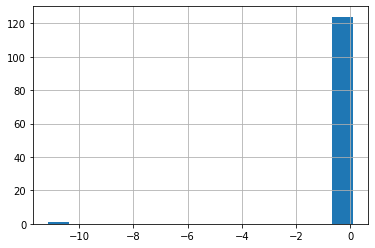

In [35]:
xScaled.type.hist(bins= 15)

In [36]:
# xScaled.head()
xScaled.reset_index()

,index,type,team_0_cards_0_name_mapped,team_0_cards_1_name_mapped,team_0_cards_2_name_mapped,team_0_cards_3_name_mapped,team_0_cards_4_name_mapped,team_0_cards_5_name_mapped,team_0_cards_6_name_mapped,team_0_cards_7_name_mapped,opponent_0_cards_0_name_mapped,opponent_0_cards_1_name_mapped,opponent_0_cards_2_name_mapped,opponent_0_cards_3_name_mapped,opponent_0_cards_4_name_mapped,opponent_0_cards_5_name_mapped,opponent_0_cards_6_name_mapped,opponent_0_cards_7_name_mapped
0,0,-11.135529,-1.368212,1.406667,2.219683,1.709735,-2.217900,-0.033736,0.493426,-0.042520,0.282264,-0.028200,1.200836,0.031075,-0.009596,1.243605,-0.086570,1.137929
1,1,0.089803,-1.368212,1.406667,2.219683,1.709735,-2.217900,-0.033736,0.493426,-0.042520,1.060606,-0.028200,0.222570,-0.050462,-3.658579,0.117890,-0.086570,1.291219
2,2,0.089803,-0.299178,1.406667,-0.282473,0.199987,0.271684,0.197207,0.198760,0.019196,-0.763090,1.145862,-0.955887,-0.050462,0.288402,-2.006052,-1.152833,0.014311
3,3,0.089803,-1.368212,-0.057180,-0.014289,1.503767,-4.780023,-4.855825,-0.606266,-1.009000,-1.096856,1.216334,0.022379,-2.847175,-1.101758,1.052374,-0.934635,0.090956
4,4,0.089803,-1.441134,-1.820586,-0.014289,1.503767,1.480205,-0.033736,1.357385,-0.104237,1.260866,-1.202262,0.089109,-0.050462,-1.101758,1.179861,0.204362,0.090956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,120,0.089803,-0.226256,-0.356739,-0.014289,1.606751,0.271684,1.325748,0.375559,1.047392,-1.030103,-4.583504,1.267566,-0.050462,0.213903,0.054146,0.058896,-0.062334
121,121,0.089803,-0.226256,-0.356739,-0.014289,1.606751,0.271684,1.325748,0.375559,1.047392,-0.051501,0.042272,-1.089348,0.031075,-0.084095,1.179861,-0.086570,1.137929
122,122,0.089803,-0.226256,-0.356739,-0.014289,1.606751,0.271684,1.325748,0.375559,1.047392,0.082005,1.286806,-0.111082,-0.213535,-1.176257,1.052374,0.058896,-0.062334
123,123,0.089803,-0.226256,-0.356739,-0.014289,1.606751,0.271684,1.325748,0.375559,1.047392,-0.963350,-1.061318,-0.955887,-0.050462,1.380564,-4.066250,0.058896,-1.415887


In [37]:
x_train = xScaled
y_train = y

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
model.fit(x_train,y_train)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
# np.isfinite(xScaled)

In [42]:
# np.where(np.isfinite(xScaled))

In [43]:
# x_scaled= np.nan_to_num(xScaled)

In [44]:
# model.fit(x_scaled,y)

In [45]:
from sklearn.ensemble import RandomForestClassifier 
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_6592/3530812869.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train,y_train)


RandomForestClassifier()

In [46]:
model2.score(x_train,y_train)

1.0

In [89]:
model2.score(x_test,y_test)

0.84

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
# cvs = cross_val_score()


clf =svm.SVC(kernel='linear', C=5).fit(x_train, y_train)
clf.score(x_test, y_test)


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6

In [91]:
score_LR = cross_val_score(model,x_test,y_test,cv=3)
max(score_LR)

0.875

In [92]:
score_RF = cross_val_score(model2,x_test,y_test,cv=5)
score_RF

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([1. , 0.8, 0.8, 0.8, 0.8])

In [93]:
# np.argmax(score)
for i in range(len(score_RF)):
    print(score_RF[i])

1.0
0.8
0.8
0.8
0.8


In [94]:
max(score_RF)

1.0

In [95]:
cross_val_score(clf, x_train, y_train, cv=5, scoring='f1_macro')

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vect

array([0.48      , 0.36332767, 0.3902439 , 0.41860465, 0.53222453])

In [96]:
# scores

In [97]:
from sklearn.metrics import classification_report

#  importing testing dataset

### encoding the test dataset handling missing values then evaluating the model with confusion matrix,crossvalscore

In [98]:
pred = pd.read_csv("CR_test_dataset.csv",usecols=['type','team_0_crowns','team_0_cards_0_name','team_0_cards_1_name','team_0_cards_2_name','team_0_cards_3_name','team_0_cards_4_name','team_0_cards_5_name','team_0_cards_6_name','team_0_cards_7_name','opponent_0_crowns','opponent_0_cards_0_name','opponent_0_cards_1_name','opponent_0_cards_2_name','opponent_0_cards_3_name','opponent_0_cards_4_name','opponent_0_cards_5_name','opponent_0_cards_6_name','opponent_0_cards_7_name'])

In [99]:

pred.head(),
pred.info(),
pred.describe(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   type                     25 non-null     object
 1   team_0_crowns            25 non-null     int64 
 2   team_0_cards_0_name      25 non-null     object
 3   team_0_cards_1_name      25 non-null     object
 4   team_0_cards_2_name      25 non-null     object
 5   team_0_cards_3_name      25 non-null     object
 6   team_0_cards_4_name      25 non-null     object
 7   team_0_cards_5_name      25 non-null     object
 8   team_0_cards_6_name      25 non-null     object
 9   team_0_cards_7_name      25 non-null     object
 10  opponent_0_crowns        25 non-null     int64 
 11  opponent_0_cards_0_name  25 non-null     object
 12  opponent_0_cards_1_name  25 non-null     object
 13  opponent_0_cards_2_name  25 non-null     object
 14  opponent_0_cards_3_name  25 non-null     obj

(       team_0_crowns  opponent_0_crowns
 count      25.000000          25.000000
 mean        0.880000           0.200000
 std         0.439697           0.408248
 min         0.000000           0.000000
 25%         1.000000           0.000000
 50%         1.000000           0.000000
 75%         1.000000           0.000000
 max         2.000000           1.000000,)

In [100]:
 [i for i in pred.columns]

['type',
 'team_0_crowns',
 'team_0_cards_0_name',
 'team_0_cards_1_name',
 'team_0_cards_2_name',
 'team_0_cards_3_name',
 'team_0_cards_4_name',
 'team_0_cards_5_name',
 'team_0_cards_6_name',
 'team_0_cards_7_name',
 'opponent_0_crowns',
 'opponent_0_cards_0_name',
 'opponent_0_cards_1_name',
 'opponent_0_cards_2_name',
 'opponent_0_cards_3_name',
 'opponent_0_cards_4_name',
 'opponent_0_cards_5_name',
 'opponent_0_cards_6_name',
 'opponent_0_cards_7_name']

In [101]:
dict = { "friendly":4,
         "PvP":4, 
        "challenge": 4,
        "clanMate":4,
        "casual2v2" :0 }
pred["type"] = pred["type"].map(dict)

In [102]:
pred.head()

,type,team_0_crowns,team_0_cards_0_name,team_0_cards_1_name,team_0_cards_2_name,team_0_cards_3_name,team_0_cards_4_name,team_0_cards_5_name,team_0_cards_6_name,team_0_cards_7_name,opponent_0_crowns,opponent_0_cards_0_name,opponent_0_cards_1_name,opponent_0_cards_2_name,opponent_0_cards_3_name,opponent_0_cards_4_name,opponent_0_cards_5_name,opponent_0_cards_6_name,opponent_0_cards_7_name
0,4,1,Goblin Drill,Tesla,Giant Snowball,Archer Queen,Skeletons,Bandit,Royal Ghost,Fire Spirit,0,Goblin Barrel,Electro Spirit,Guards,Valkyrie,Tesla,Rocket,The Log,Princess
1,4,1,Goblin Drill,Tesla,Giant Snowball,Archer Queen,Skeletons,Bandit,Royal Ghost,Fire Spirit,0,Valkyrie,Mortar,The Log,Miner,Fireball,Fire Spirit,Archer Queen,Skeletons
2,4,1,Goblin Drill,Tesla,Giant Snowball,Archer Queen,Skeletons,Bandit,Royal Ghost,Fire Spirit,0,Lava Hound,Balloon,Zap,Fireball,Skeleton Dragons,Valkyrie,Tombstone,Mega Minion
3,4,1,Goblin Drill,Tesla,Giant Snowball,Archer Queen,Skeletons,Bandit,Royal Ghost,Fire Spirit,0,Valkyrie,Hog Rider,Goblins,Ice Spirit,Executioner,Tornado,Rocket,The Log
4,4,1,Hog Rider,Fire Spirit,Knight,Earthquake,Archer Queen,Bomb Tower,Skeletons,The Log,0,Inferno Dragon,Baby Dragon,Tornado,Freeze,Bowler,Graveyard,Tombstone,Skeleton King


In [103]:
pred["outcome"] = pred["team_0_crowns"]-pred["opponent_0_crowns"]
# import numpy as np
pred["outcome"]=np.where(pred["outcome"]<0,0,1)
pred.drop(["team_0_crowns","opponent_0_crowns"],inplace=True,axis=1)


In [104]:
X_pred = pred.drop(["outcome"],axis = 1)
y_test = pred["outcome"].copy()

In [105]:
# X = pred.drop(["outcome"],axis = 1)
# y = df["outcome"].copy()
# import csv
cards_encoded = {'Earthquake': 86.3, 'Fireball': 87.3, 'Poison': 88.3, 'The Log': 101.96000000000001, 'Tornado': 102.96000000000001, 'Zap': 85.3, 'Giant Snowball': 68.64, 'Barbarian Barrel': 85.3, 'Arrows': 86.3, 'Royal Delivery': 86.3, 'Rocket': 89.3, 'Lightning': 89.3, 'Freeze': 87.3, 'Rage': 68.64, 'Clone': 69.64, 'Mirror': 16.66, 'Golden Knight': 87.3, 'Archer Queen': 104.96000000000001, 'Skeleton King': 104.96000000000001, 'Balloon': 71.64, 'Hog Rider': 87.3, 'Royal Giant': 89.3, 'Elixir Golem': 36.32, 'Goblin Barrel': 86.3, 'Ram Rider': 88.3, 'Sparky': 55.980000000000004, 'Magic Archer': 103.96000000000001, 'Giant': 71.64, 'Battle Ram': 70.64, 'Royal Ghost': 69.64, 'Ice Wizard': 69.64, 'Mortar': 70.64, 'Skeleton Barrel': 69.64, 'X-Bow': 72.64, 'Golem': 74.64, 'Three Musketeers': 58.980000000000004, 'Lava Hound': 90.3, 'Electro Giant': 74.64, 'Wall Breakers': 85.3, 'Miner': 86.3, 
'Graveyard': 104.96000000000001, 'Goblin Giant': 55.980000000000004, 'Bats': 85.3, 'Minion Horde': 21.66, 'Baby Dragon': 103.96000000000001, 'Skeleton Dragons': 53.980000000000004, 'Minions': 69.64, 'Inferno Dragon': 87.3, 'Mega Minion': 69.64, 'Electro Dragon': 54.980000000000004, 'Flying Machine': 87.3, 'Furnace': 70.64, 'Inferno Tower': 70.64, 'Tesla': 87.3, 'Goblin Hut': 
54.980000000000004, 'Elixir Collector': 39.32, 'Tombstone': 102.96000000000001, 'Barbarian Hut': 23.66, 'Cannon': 69.64, 'Bomb Tower': 70.64, 'Goblin Cage': 70.64, 'Witch': 71.64, 'Executioner': 71.64, 'Fire Spirit': 84.3, 'Bomber': 85.3, 'Firecracker': 86.3, 'Mega Knight': 90.3, 'Skeleton Army': 86.3, 'Electro Wizard': 103.96000000000001, 'Wizard': 71.64, 'Valkyrie': 103.96000000000001, 'Prince': 88.3, 'Mini P.E.K.K.A': 70.64, 'Dark Prince': 88.3, 'P.E.K.K.A': 90.3, 'Lumberjack': 87.3, 'Royal Hogs': 88.3, 'Giant Skeleton': 39.32, 'Barbarians': 38.32, 'Goblin Gang': 36.32, 'goblin drill': 69.64, 'Royale Ghost': 86.3, 'Bandit': 86.3, 'Musketeer': 103.96000000000001, 'Heal spirit': 50.980000000000004, 'Elite Barbarians': 72.64, 'Dart Goblin': 86.3, 'Bowler': 71.64, 'Knight': 102.96000000000001, 'Princess': 86.3, 'Spear Goblins': 85.3, 'Ice Spirit': 84.3, 'Rascals': 71.64, 'Zappies': 87.3, 'Guards': 102.96000000000001, 'Night Witch': 53.980000000000004, 'Hunter': 87.3, 'Mother Witch': 70.64, 'Fisherman': 69.64, 'Electro Spirit': 84.3, 'Royal Recruits': 56.980000000000004, 'Ice Golem': 85.3, 'Skeletons': 84.3, 'Cannon Cart': 88.3, 'Archers': 69.64, 'Goblins': 51.980000000000004, 'Battle Healer': 20.66}
dict1 =  cards_encoded

df = pd.DataFrame(data=dict1, index=[0])

df = (df.T)

# print (df)
with open('prediction.csv', 'w') as output:
    writer = csv.writer(output)
    for key, value in dict1.items():
        writer.writerow([key,value])

In [106]:
X_pred

,type,team_0_cards_0_name,team_0_cards_1_name,team_0_cards_2_name,team_0_cards_3_name,team_0_cards_4_name,team_0_cards_5_name,team_0_cards_6_name,team_0_cards_7_name,opponent_0_cards_0_name,opponent_0_cards_1_name,opponent_0_cards_2_name,opponent_0_cards_3_name,opponent_0_cards_4_name,opponent_0_cards_5_name,opponent_0_cards_6_name,opponent_0_cards_7_name
0,4,Goblin Drill,Tesla,Giant Snowball,Archer Queen,Skeletons,Bandit,Royal Ghost,Fire Spirit,Goblin Barrel,Electro Spirit,Guards,Valkyrie,Tesla,Rocket,The Log,Princess
1,4,Goblin Drill,Tesla,Giant Snowball,Archer Queen,Skeletons,Bandit,Royal Ghost,Fire Spirit,Valkyrie,Mortar,The Log,Miner,Fireball,Fire Spirit,Archer Queen,Skeletons
2,4,Goblin Drill,Tesla,Giant Snowball,Archer Queen,Skeletons,Bandit,Royal Ghost,Fire Spirit,Lava Hound,Balloon,Zap,Fireball,Skeleton Dragons,Valkyrie,Tombstone,Mega Minion
3,4,Goblin Drill,Tesla,Giant Snowball,Archer Queen,Skeletons,Bandit,Royal Ghost,Fire Spirit,Valkyrie,Hog Rider,Goblins,Ice Spirit,Executioner,Tornado,Rocket,The Log
4,4,Hog Rider,Fire Spirit,Knight,Earthquake,Archer Queen,Bomb Tower,Skeletons,The Log,Inferno Dragon,Baby Dragon,Tornado,Freeze,Bowler,Graveyard,Tombstone,Skeleton King
5,4,Hog Rider,Fire Spirit,Guards,Earthquake,Archer Queen,Ice Golem,Mini P.E.K.K.A,The Log,Bowler,Graveyard,Skeleton King,Giant Snowball,Mega Minion,Zappies,Tombstone,Arrows
6,4,Hog Rider,Fire Spirit,Guards,Earthquake,Archer Queen,Ice Golem,Mini P.E.K.K.A,The Log,Bowler,Graveyard,Skeleton King,Giant Snowball,Mega Minion,Zappies,Tombstone,Arrows
7,4,Hog Rider,Fire Spirit,Skeletons,Earthquake,Archer Queen,Knight,Bomb Tower,The Log,Bowler,Graveyard,Skeleton King,Giant Snowball,Mega Minion,Zappies,Tombstone,Arrows
8,4,Goblin Drill,Tesla,Giant Snowball,Archer Queen,Skeletons,Bandit,Royal Ghost,Fire Spirit,Skeletons,Royal Delivery,Royal Hogs,Archer Queen,Cannon,Fire Spirit,Earthquake,The Log
9,4,Arrows,Miner,Mortar,Dart Goblin,Bats,Skeleton Army,Skeleton King,Minion Horde,Graveyard,Ice Wizard,Valkyrie,Baby Dragon,Poison,Tombstone,Barbarian Barrel,Tornado


In [107]:
encodedRanks = pd.read_csv("output1.csv")

In [108]:
d = encodedRanks.set_index('name')['elixir'].to_dict()
d

{'Earthquake': 86.3,
 'Fireball': 87.3,
 'Poison': 88.3,
 'The Log': 101.96,
 'Tornado': 102.96,
 'Zap': 85.3,
 'Giant Snowball': 68.64,
 'Barbarian Barrel': 85.3,
 'Arrows': 86.3,
 'Royal Delivery': 86.3,
 'Rocket': 89.3,
 'Lightning': 89.3,
 'Freeze': 87.3,
 'Rage': 68.64,
 'Clone': 69.64,
 'Mirror': 16.66,
 'Golden Knight': 87.3,
 'Archer Queen': 104.96,
 'Skeleton King': 104.96,
 'Balloon': 71.64,
 'Hog Rider': 87.3,
 'Royal Giant': 89.3,
 'Elixir Golem': 36.32,
 'Goblin Barrel': 86.3,
 'Ram Rider': 88.3,
 'Sparky': 55.98,
 'Magic Archer': 103.96,
 'Giant': 71.64,
 'Battle Ram': 70.64,
 'Royal Ghost': 69.64,
 'Ice Wizard': 69.64,
 'Mortar': 70.64,
 'Skeleton Barrel': 69.64,
 'X-Bow': 72.64,
 'Golem': 74.64,
 'Three Musketeers': 58.98,
 'Lava Hound': 90.3,
 'Electro Giant': 74.64,
 'Wall Breakers': 85.3,
 'Miner': 86.3,
 'Graveyard': 104.96,
 'Goblin Giant': 55.98,
 'Bats': 85.3,
 'Minion Horde': 21.66,
 'Baby Dragon': 103.96,
 'Skeleton Dragons': 53.98,
 'Minions': 69.64,
 'Inferno

In [109]:
for i in X_pred.columns :
    X_pred[i+"_mapped"] = X_pred[i].map(d) 

In [110]:
X_pred.head()
columns =["type_mapped","team_0_cards_0_name","team_0_cards_1_name","team_0_cards_2_name","team_0_cards_3_name","team_0_cards_4_name","team_0_cards_5_name","team_0_cards_6_name","team_0_cards_7_name","opponent_0_cards_0_name","opponent_0_cards_1_name","opponent_0_cards_2_name","opponent_0_cards_3_name","opponent_0_cards_4_name","opponent_0_cards_5_name","opponent_0_cards_6_name","opponent_0_cards_7_name"]



x_pred = X_pred.drop(columns,axis = 1)

In [111]:
x_pred.isnull().sum()

type                              0
team_0_cards_0_name_mapped        7
team_0_cards_1_name_mapped        0
team_0_cards_2_name_mapped        0
team_0_cards_3_name_mapped        0
team_0_cards_4_name_mapped        0
team_0_cards_5_name_mapped        2
team_0_cards_6_name_mapped        0
team_0_cards_7_name_mapped        0
opponent_0_cards_0_name_mapped    2
opponent_0_cards_1_name_mapped    0
opponent_0_cards_2_name_mapped    0
opponent_0_cards_3_name_mapped    0
opponent_0_cards_4_name_mapped    0
opponent_0_cards_5_name_mapped    0
opponent_0_cards_6_name_mapped    0
opponent_0_cards_7_name_mapped    0
dtype: int64

In [112]:
x_pred.fillna(52.00, inplace=True)
x_pred.isnull().sum()
# x.drop(["team_0_cards_6_name_md","nan_missng values"],axis= 1,inplace=True)

type                              0
team_0_cards_0_name_mapped        0
team_0_cards_1_name_mapped        0
team_0_cards_2_name_mapped        0
team_0_cards_3_name_mapped        0
team_0_cards_4_name_mapped        0
team_0_cards_5_name_mapped        0
team_0_cards_6_name_mapped        0
team_0_cards_7_name_mapped        0
opponent_0_cards_0_name_mapped    0
opponent_0_cards_1_name_mapped    0
opponent_0_cards_2_name_mapped    0
opponent_0_cards_3_name_mapped    0
opponent_0_cards_4_name_mapped    0
opponent_0_cards_5_name_mapped    0
opponent_0_cards_6_name_mapped    0
opponent_0_cards_7_name_mapped    0
dtype: int64

In [113]:
x_Scaled_pred = pd.DataFrame(std.fit_transform(x_pred),columns=x_pred.columns)
x_Scaled_pred

,type,team_0_cards_0_name_mapped,team_0_cards_1_name_mapped,team_0_cards_2_name_mapped,team_0_cards_3_name_mapped,team_0_cards_4_name_mapped,team_0_cards_5_name_mapped,team_0_cards_6_name_mapped,team_0_cards_7_name_mapped,opponent_0_cards_0_name_mapped,opponent_0_cards_1_name_mapped,opponent_0_cards_2_name_mapped,opponent_0_cards_3_name_mapped,opponent_0_cards_4_name_mapped,opponent_0_cards_5_name_mapped,opponent_0_cards_6_name_mapped,opponent_0_cards_7_name_mapped
0,0.0,-1.433283,-0.178776,-0.802846,1.208366,-0.588625,-0.139450,-1.018197,-0.242050,0.119318,-0.418075,0.910561,1.043877,0.433070,-0.295776,0.948329,-0.167810
1,0.0,-1.433283,-0.178776,-0.802846,1.208366,-0.588625,-0.139450,-1.018197,-0.242050,1.337047,-1.618046,0.834054,-0.283518,0.433070,-0.837253,1.186842,-0.346406
2,0.0,-1.433283,-0.178776,-0.802846,1.208366,-0.588625,-0.139450,-1.018197,-0.242050,0.395134,-1.530201,-0.440560,-0.208355,-1.999808,1.291834,1.027833,-1.655521
3,0.0,-1.433283,-0.178776,-0.802846,1.208366,-0.588625,-0.139450,-1.018197,-0.242050,1.337047,-0.154538,-2.989788,-0.433846,-0.710354,1.183539,-0.058197,1.230604
4,0.0,0.636613,-0.443550,1.739944,-0.408960,1.292484,-1.209517,0.021677,0.848632,0.188272,1.308970,0.910561,-0.208355,-0.710354,1.400130,1.027833,1.498499
5,0.0,0.636613,-0.443550,1.739944,-0.408960,1.292484,-0.207782,-0.947264,0.848632,-0.891549,1.396816,1.063576,-1.610914,-0.856385,-0.512367,1.027833,-0.167810
6,0.0,0.636613,-0.443550,1.739944,-0.408960,1.292484,-0.207782,-0.947264,0.848632,-0.891549,1.396816,1.063576,-1.610914,-0.856385,-0.512367,1.027833,-0.167810
7,0.0,0.636613,-0.443550,0.357413,-0.408960,1.292484,0.998948,-0.947264,0.848632,-0.891549,1.396816,1.063576,-1.610914,-0.856385,-0.512367,1.027833,-0.167810
8,0.0,-1.433283,-0.178776,-0.802846,1.208366,-0.588625,-0.139450,-1.018197,-0.242050,-0.018590,-0.242384,-0.211038,1.119041,-0.856385,-0.837253,-0.296711,1.230604
9,0.0,0.577976,-0.267034,-0.654665,-0.408960,-0.497574,-0.139450,1.487147,-4.110696,1.406001,-1.705892,0.987068,1.043877,0.506085,1.183539,-0.376215,1.319902


In [114]:
np.isfinite(x_Scaled_pred)
np.where(np.isfinite(x_Scaled_pred))
x_test = np.nan_to_num(x_Scaled_pred)

In [115]:
# x_test = pd.DataFrame(x_test)
# x_test.info()

In [116]:
y_predicted = model2.predict(x_test)

In [117]:
from sklearn.svm import SVC 
model3 = SVC()
model3.fit(x_train,y_train)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [118]:
# y_pred

y_pred_SVM = model.predict(x_test)
confusion_matrix(y_pred_SVM,y_predicted)


array([[ 0,  5],
       [ 0, 20]], dtype=int64)

In [119]:
from sklearn.metrics import classification_report


In [120]:
cls = classification_report(y_test,y_predicted)
print(cls)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.84      1.00      0.91        21

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25



c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
y_pred_LR = model.predict(x_test)

In [123]:
logistic_regression  =  confusion_matrix(y_test,y_pred_LR)
logistic_regression

array([[ 0,  4],
       [ 5, 16]], dtype=int64)

In [126]:

y_pred_RF = model2.predict(x_test)
RF_model = confusion_matrix(y_test,y_pred_RF)
RF_model

array([[ 0,  4],
       [ 0, 21]], dtype=int64)

In [129]:
print(f"classification report for logistic regression : '\n\n\n\n\n\n'{classification_report(y_pred_LR,y_test)}")

classification report for logistic regression : '





'              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.76      0.80      0.78        20

    accuracy                           0.64        25
   macro avg       0.38      0.40      0.39        25
weighted avg       0.61      0.64      0.62        25



In [130]:
print(f"classification report for Random Forest : '\n\n\n\n\n\n' {classification_report(y_pred_RF,y_test)}")

classification report for Random Forest : '





'               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.84      0.91        25

    accuracy                           0.84        25
   macro avg       0.50      0.42      0.46        25
weighted avg       1.00      0.84      0.91        25



c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [131]:

print(f"classification report for Support vector machine : '\n\n\n\n\n\n' {classification_report(y_pred_SVM,y_test)}")


classification report for Support vector machine : '





'               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.76      0.80      0.78        20

    accuracy                           0.64        25
   macro avg       0.38      0.40      0.39        25
weighted avg       0.61      0.64      0.62        25



In [132]:
# plt.scatter(x_test,y_test)
# plt.scatter(xScaled,y)
# y_test.count()
# x_test.count()
# # plt.scatter(x_train.iloc[:,0],y_train)
# plt.scatter(x_test[:,0],y_test)
# plt.show()

In [149]:
import pickle
 

RF_model_pickle = pickle.dumps(model2)
 

pickle_model_RF = pickle.loads(RF_model_pickle)
 


In [143]:
x_Scaled_pred.iloc[17]

type                              0.000000
team_0_cards_0_name_mapped       -0.105735
team_0_cards_1_name_mapped       -1.649156
team_0_cards_2_name_mapped        1.814034
team_0_cards_3_name_mapped       -0.582307
team_0_cards_4_name_mapped        1.201434
team_0_cards_5_name_mapped       -0.002788
team_0_cards_6_name_mapped        0.376341
team_0_cards_7_name_mapped        0.910392
opponent_0_cards_0_name_mapped    0.119318
opponent_0_cards_1_name_mapped   -0.154538
opponent_0_cards_2_name_mapped   -0.364053
opponent_0_cards_3_name_mapped   -0.133191
opponent_0_cards_4_name_mapped    0.214023
opponent_0_cards_5_name_mapped   -0.620663
opponent_0_cards_6_name_mapped    1.027833
opponent_0_cards_7_name_mapped   -0.257108
Name: 17, dtype: float64

In [165]:
import numpy as np

new_predict = np.array([4.0, -3.433283,-0.878776,-0.102846,4.208366,-0.99862,-0.939450,-11.7,-10.942050,0.019318,-0.0018075,0.991061,8.993877,0.13070,-0.595776,0.848329,-0.127810])



In [150]:
pickle_model_RF.predict(new_predict)

array([1])

In [178]:
new_predict = new_predict.reshape(1,-1)

In [179]:
new_predict.shape

(1, 17)

In [186]:
filename = 'finalized_LR_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(new_predict)

array([0])

In [187]:
filename = 'finalized_RF_model.sav'
pickle.dump(model2, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(new_predict)

array([1])